# **For CNN**

In [ ]:
 import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras import optimizers
from keras.layers.advanced_activations import ELU, PReLU, LeakyReLU
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),  padding='same',
                 input_shape=(64, 64, 3)))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
'''
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu')) 
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
'''
model.add(Flatten())
#model.add(Dense(10))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(80))
model.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6,)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy','mse',keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
  model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        1

In [ ]:
f="/content/drive/My Drive/btech project/voice-classification-master/weights/model.h5"
model.load_weights(f)

In [ ]:
import subprocess
import matplotlib.pyplot
import os
import matplotlib.pyplot as plt
rootdir = '/content/drive/My Drive/btech project/voice-classification-master/tfdata1/train/'

In [ ]:
spectograms = []
spect_read = []
spectograms_ids = []
for subdir, dirs, files in os.walk(rootdir):
    print(subdir)
    for file in files:
        if file.endswith('png'): 
            
               # x = plt.imread(subdir+'/'+file,)
               # print(type(x))
                pic = Image.open(subdir+'/'+file).convert('RGB').resize((64, 64))
                
                x = np.array(pic)/255
                
            #if str(x.shape) == '(513, 800, 3)': 
                spect_read.append(x)
                #print(subdir) 
                name = subdir.replace(rootdir, '')
                #print(name)
                #name = name.replace('/spects', "")
                spectograms_ids.append(name)
                spectograms.append(file)
x_train = spect_read
y_train = spectograms_ids

y_train

/content/drive/My Drive/btech project/voice-classification-master/tfdata1/train/
/content/drive/My Drive/btech project/voice-classification-master/tfdata1/train/speaker109
/content/drive/My Drive/btech project/voice-classification-master/tfdata1/train/speaker110
/content/drive/My Drive/btech project/voice-classification-master/tfdata1/train/speaker111
/content/drive/My Drive/btech project/voice-classification-master/tfdata1/train/speaker112
/content/drive/My Drive/btech project/voice-classification-master/tfdata1/train/speaker113


['speaker109',
 'speaker109',
 'speaker109',
 'speaker109',
 'speaker109',
 'speaker109',
 'speaker110',
 'speaker110',
 'speaker110',
 'speaker110',
 'speaker110',
 'speaker110',
 'speaker111',
 'speaker111',
 'speaker111',
 'speaker111',
 'speaker111',
 'speaker111',
 'speaker112',
 'speaker112',
 'speaker112',
 'speaker112',
 'speaker112',
 'speaker112',
 'speaker113',
 'speaker113',
 'speaker113',
 'speaker113',
 'speaker113',
 'speaker113']

In [ ]:
x_train[1].shape

(64, 64, 3)

In [ ]:
rootdir = '/content/drive/My Drive/btech project/voice-classification-master/tfdata1/test/'
spectograms = []
spect_read = []
spectograms_ids = []
for subdir, dirs, files in os.walk(rootdir):
    print(subdir)
    for file in files:
        if file.endswith('png'): 
            #try:
               # x = plt.imread(subdir+'/'+file)
                  pic = Image.open(subdir+'/'+file).convert('RGB').resize((64, 64))
                
                  x = np.array(pic)/255
            #except:
             #   continue
                #if str(x.shape) != '(64, 64, 3)':
                   
                  #image = x.reshape(64, 64, 3)
                  #print(image)
                  spect_read.append(x)
                  name = subdir.replace(rootdir, '')
                  #name = name.replace('/spects', "")
                  spectograms_ids.append(name)
                  spectograms.append(file)
x_test = spect_read
y_test = spectograms_ids
y_test

/content/drive/My Drive/btech project/voice-classification-master/tfdata1/test/
/content/drive/My Drive/btech project/voice-classification-master/tfdata1/test/speaker111
/content/drive/My Drive/btech project/voice-classification-master/tfdata1/test/speaker112
/content/drive/My Drive/btech project/voice-classification-master/tfdata1/test/speaker113
/content/drive/My Drive/btech project/voice-classification-master/tfdata1/test/speaker109
/content/drive/My Drive/btech project/voice-classification-master/tfdata1/test/speaker110


['speaker111',
 'speaker111',
 'speaker111',
 'speaker111',
 'speaker111',
 'speaker111',
 'speaker112',
 'speaker112',
 'speaker112',
 'speaker112',
 'speaker112',
 'speaker112',
 'speaker113',
 'speaker113',
 'speaker113',
 'speaker113',
 'speaker113',
 'speaker113',
 'speaker109',
 'speaker109',
 'speaker109',
 'speaker109',
 'speaker109',
 'speaker109',
 'speaker110',
 'speaker110',
 'speaker110',
 'speaker110',
 'speaker110',
 'speaker110']

In [ ]:
type(x_train)

list

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
y_temp_train = y_train
encoder.fit(y_temp_train)
encoded_Y = encoder.transform(y_temp_train)
dummy_y = np_utils.to_categorical(encoded_Y)

y_temp2_train = y_test
encoder.fit(y_temp2_train)
encoded_Y = encoder.transform(y_temp2_train)
dummy2_y = np_utils.to_categorical(encoded_Y)

In [ ]:
dummy_y.shape
x_train[0].shape

(64, 64, 3)

In [ ]:
path="/content/drive/My Drive/btech project/voice-classification-master"

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1), #to apply some random tranfromations
 #to apply zoom
        ) # im
test_datagen = ImageDataGenerator(
        rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1), #to apply some random tranfromations
 #to apply zoom
        ) # im


In [ ]:
training_set = train_datagen.flow_from_directory(path+
        '/train_set', 
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)
test_set = test_datagen.flow_from_directory(path+
        '/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        shuffle = False )

Found 664 images belonging to 3 classes.
Found 325 images belonging to 3 classes.


In [ ]:
'''
from keras.engine import InputLayer
#input_layer = InputLayer(input_shape=(449, 460, 3), name="input_1")
model.layers[0]=input_layer
input_layer=Reshape((449,​460,3), input_shape=(160,320,3)))
'''




In [ ]:
from keras.models import Model
model2 = Model(inputs=model.input, outputs=model.get_layer('flatten').output)

In [ ]:
model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)       

In [ ]:
svm_x_train = []
svm_y_train = []
for i in range(len(x_train)):
    x_1 = np.expand_dims(x_train[i], axis=0)
    flatten_2_features = model2.predict(x_1)
    svm_x_train.append(flatten_2_features)
    svm_y_train.append(dummy_y[i])

In [ ]:
dummy_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
svm_y_train

In [ ]:
from sklearn import svm
svm_x_train = np.array(svm_x_train)
clf = svm.SVC(kernel='rbf', class_weight='balanced')
dataset_size = len(svm_x_train)
svm_x_train = np.array(svm_x_train).reshape(dataset_size,-1)
svm_y_train = np.array(svm_y_train)
svm_y_train = [np.where(r==1)[0][0] for r in svm_y_train]

In [ ]:

clf.fit(svm_x_train, svm_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_x_test = []
svm_y_test = []
for i in range(len(x_test)):
    x_1 = np.expand_dims(x_test[i], axis=0)
    #x_1 = preprocess_input(x_1)
    flatten_2_features = model2.predict(x_1)
    #print(flatten_2_features)
    svm_x_test.append(flatten_2_features)
    svm_y_test.append(dummy2_y[i])
svm_x_test = np.array(svm_x_test)

In [ ]:
dataset_size = len(svm_x_test)
svm_x_test = np.array(svm_x_test).reshape(dataset_size,-1)
svm_y_test = [np.where(r==1)[0][0] for r in svm_y_test]

In [ ]:
print(svm_y_test)
print(clf.predict(svm_x_test))

[2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
[2 2 2 2 2 2 3 3 3 0 3 2 4 4 4 4 4 4 0 0 0 0 0 0 1 1 0 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(svm_y_test, clf.predict(svm_x_test))

0.9

In [ ]:
from sklearn.preprocessing import label_binarize
svm_y_test = label_binarize(svm_y_test, classes=[0, 1, 2,3,4])

n_classes = svm_y_test.shape[1]
n_classes

5

In [ ]:
svm_x_test.ndim

2

In [ ]:
y_score = clf.decision_function(svm_x_test)


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(svm_y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(svm_y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(svm_y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(svm_y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.92


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.92')

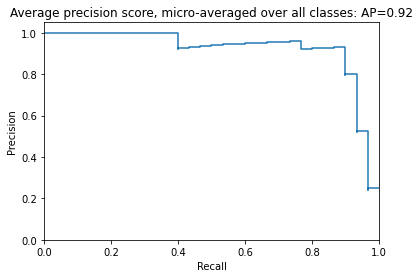

In [ ]:
plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

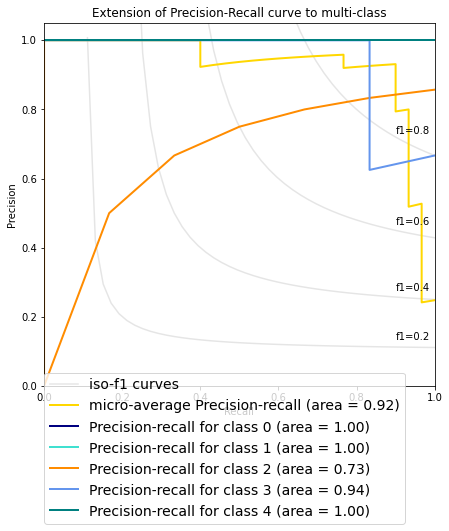

In [ ]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

# **For ANN**

In [ ]:
model.load_weights('/content/drive/MyDrive/btech project/voice-classification-master/ann_weights80.h5')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/btech project/voice-classification-master/ann_data/train.csv')

data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
data=data[:-1]
speaker_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(speaker_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set

X_train=X
y_train=y


In [ ]:
from keras.models import Model
model2 = Model(inputs=model.input, outputs=model.get_layer('dense_22').output)

In [ ]:
model2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20_input (InputLayer)  [(None, 26)]              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               13824     
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
Total params: 178,048
Trainable params: 178,048
Non-trainable params: 0
_________________________________________________________________


In [ ]:
svm_x_train = []
svm_y_train = []
for i in range(len(X_train)):
    x_1 = np.expand_dims(X_train[i], axis=0)
    flatten_2_features = model2.predict(x_1)
    svm_x_train.append(flatten_2_features)
    svm_y_train.append(y[i])

In [ ]:
from sklearn import svm
svm_x_train = np.array(svm_x_train)
clf = svm.SVC(kernel='rbf', class_weight='balanced')
dataset_size = len(svm_x_train)
svm_x_train = np.array(svm_x_train).reshape(dataset_size,-1)
svm_y_train = np.array(svm_y_train)
#svm_y_train = [np.where(r==1) for r in svm_y_train]

In [ ]:
svm_y_train

array([4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1])

In [ ]:
clf.fit(svm_x_train, svm_y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/btech project/voice-classification-master/ann_data/test.csv')

data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
data=data[:-1]
speaker_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(speaker_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set

X_test=X
y_test=y

In [ ]:
cls=[]
c=0
for i in encoder.classes_:
  c+=1
  cls.append(i)
print(c)
encoder.classes_

5


array(['/wav-178', '/wav-183', '/wav-187', '/wav-188', '/wav-190'],
      dtype=object)

In [ ]:
y_test = label_binarize(y_test, classes=cls)
n_classes = y_test.shape[1]


/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [ ]:
y_score = model.predict_proba(X_test)


Instructions for updating:
Please use `model.predict()` instead.


In [ ]:
svm_x_test = []
svm_y_test = []
for i in range(len(X_test)):
    x_1 = np.expand_dims(X_test[i], axis=0)
    #x_1 = preprocess_input(x_1)
    flatten_2_features = model2.predict(x_1)
    #print(flatten_2_features)
    svm_x_test.append(flatten_2_features)
    svm_y_test.append(y[i])
svm_x_test = np.array(svm_x_test)

In [ ]:
svm_y_test

In [ ]:
dataset_size = len(svm_x_test)
svm_x_test = np.array(svm_x_test).reshape(dataset_size,-1)
#svm_y_test = [np.where(r==1)[0][0] for r in svm_y_test]

In [ ]:
svm_x_test

array([[ 9.270279 ,  6.8087516,  7.452833 , ...,  6.6463966,  8.699914 ,
         6.2951527],
       [ 5.5192003,  1.305767 ,  3.7387187, ...,  3.283068 ,  2.9800084,
         4.9676595],
       [11.130788 ,  4.9213147,  1.8391031, ...,  0.9482733,  1.4712366,
         8.53951  ],
       ...,
       [ 6.847933 ,  5.887175 ,  6.91424  , ...,  2.6228921, 11.10921  ,
         6.175983 ],
       [10.356621 ,  8.531931 ,  5.715462 , ...,  6.3522544, 16.122429 ,
        19.092672 ],
       [16.344786 , 11.526242 , 11.025922 , ...,  8.8483715, 22.163923 ,
        15.600329 ]], dtype=float32)

In [ ]:
print(svm_y_test)
print(clf.predict(svm_x_test))

[4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
[3 3 4 4 4 4 3 3 3 3 3 3 2 2 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(svm_y_test, clf.predict(svm_x_test))

0.9310344827586207

In [ ]:
y_score = clf.decision_function(svm_x_test)


In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(svm_y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(svm_y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(svm_y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(svm_y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.96


Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.96')

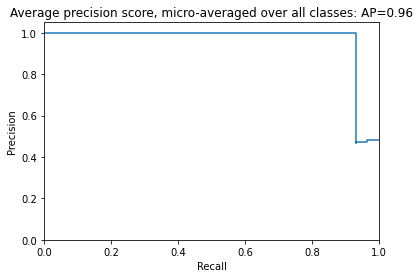

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

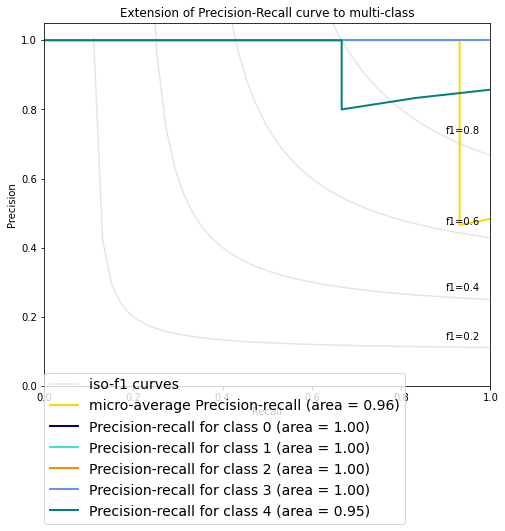

In [ ]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(8, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

# **Live**

In [3]:
!pip install ffmpeg-python

In [9]:
"""
To write this piece of code I took inspiration/code from a lot of places.
It was late night, so I'm not sure how much I created or just copied o.O
Here are some of the possible references:
https://blog.addpipe.com/recording-audio-in-the-browser-using-pure-html5-and-minimal-javascript/
https://stackoverflow.com/a/18650249
https://hacks.mozilla.org/2014/06/easy-audio-capture-with-the-mediarecorder-api/
https://air.ghost.io/recording-to-an-audio-file-using-html5-and-js/
https://stackoverflow.com/a/49019356
"""
from IPython.display import HTML, Audio
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
from scipy.io.wavfile import read as wav_read
from scipy.io.wavfile import write
import io
import ffmpeg

AUDIO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var t = document.createTextNode("Press to start recording");

my_btn.appendChild(t);
//my_p.appendChild(my_btn);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, gumStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  gumStream = stream;
  var options = {
    //bitsPerSecond: 8000, //chrome seems to ignore, always 48k
    mimeType : 'audio/webm;codecs=opus'
    //mimeType : 'audio/webm;codecs=pcm'
  };            
  //recorder = new MediaRecorder(stream, options);
  recorder = new MediaRecorder(stream);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('audio');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
      //console.log("Inside FileReader:" + base64data);
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({audio: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      gumStream.getAudioTracks()[0].stop();
      recordButton.innerText = "Saving the recording... pls wait!"
  }
}

// https://stackoverflow.com/a/951057
function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
//recordButton.addEventListener("click", toggleRecording);
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available...
  // ideally this should use something like await...
  //console.log("Inside data:" + base64data)
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def get_audio():
  display(HTML(AUDIO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  process = (ffmpeg
    .input('pipe:0')
    .output('pipe:1', format='wav')
    .run_async(pipe_stdin=True, pipe_stdout=True, pipe_stderr=True, quiet=True, overwrite_output=True)
  )
  output, err = process.communicate(input=binary)
  
  riff_chunk_size = len(output) - 8
  # Break up the chunk size into four bytes, held in b.
  q = riff_chunk_size
  b = []
  for i in range(4):
      q, r = divmod(q, 256)
      b.append(r)

  # Replace bytes 4:8 in proc.stdout with the actual size of the RIFF chunk.
  riff = output[:4] + bytes(b) + output[8:]

  sr, audio = wav_read(io.BytesIO(riff))

  return audio, sr

In [ ]:
!mkdir /content/demo

In [13]:
for i in range(5):
  audio, sr = get_audio()
  write('/content/demo/test{}.wav',rate=sr,data=audio).format(i)


KeyboardInterrupt: ignored